## Time Series Analysis 

Subsetting the CitiBike Data and testing for stationarity/autocorrelation for further time series modelling.

1. Importing the Data
2. Grouping the Data
3. Decomposition of the Data
4. Dickey Fuller Statistical Test
5. Standardizing the data using the Differencing method

### 1. Importing the Data

In [4]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

path = r'/Users/aahamoustafa/Desktop/Data Projects/CitiBike'

trips = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'trips_new.csv') ,index_col = False)

In [24]:
trips.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,stop_day,month,year,weekday,trip_distance,weekday_encoded,Age_Distribution,tripduration_minutes,startdate,stopdate
0,2319,2016-03-09 13:08:21,2016-03-09 13:47:01,520,W 52 St & 5 Ave,40.759923,-73.976485,363,West Thames St,40.708347,...,9,3,2016,Wednesday,6.677860,2,Adults,39.0,2016-03-09,2016-03-09
1,313,2015-07-09 15:42:30,2015-07-09 15:47:44,520,W 52 St & 5 Ave,40.759923,-73.976485,493,W 45 St & 6 Ave,40.756800,...,9,7,2015,Thursday,0.643981,3,Adults,5.0,2015-07-09,2015-07-09
2,798,2017-04-20 18:43:59,2017-04-20 18:57:17,520,W 52 St & 5 Ave,40.759923,-73.976485,3258,W 27 St & 10 Ave,40.750182,...,20,4,2017,Thursday,2.424841,3,Youths,13.0,2017-04-20,2017-04-20
3,3100,2017-04-23 15:23:46,2017-04-23 16:15:26,520,W 52 St & 5 Ave,40.759923,-73.976485,281,Grand Army Plaza & Central Park S,40.764397,...,23,4,2017,Sunday,0.549202,6,NaN,52.0,2017-04-23,2017-04-23
4,906,2016-01-11 18:32:33,2016-01-11 18:47:39,520,W 52 St & 5 Ave,40.759923,-73.976485,3162,W 78 St & Broadway,40.783400,...,11,1,2016,Monday,2.634014,0,Adults,15.0,2016-01-11,2016-01-11


### 2. Grouping the Data

In [209]:
trips_grouped = trips.groupby('startdate')['tripduration_minutes'].mean()
pd.DataFrame(trips_grouped)

,tripduration_minutes
startdate,
2013-07-01,16.275862
2013-07-02,17.434579
2013-07-03,14.198157
2013-07-04,20.914530
2013-07-05,15.793269
...,...
2017-12-27,11.578378
2017-12-28,10.467213
2017-12-29,9.478261


In [215]:
### converting index to datetime
trips_grouped.index = pd.to_datetime(trips_grouped.index)
print(trips_grouped.index)


DatetimeIndex(['2013-07-01', '2013-07-02', '2013-07-03', '2013-07-04',
               '2013-07-05', '2013-07-06', '2013-07-07', '2013-07-08',
               '2013-07-09', '2013-07-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='startdate', length=1459, freq=None)


In [237]:
## filtering for 2017 only 
df_2017 = trips_grouped.loc['2017']
df_2017 = pd.DataFrame(df_2017)

In [ ]:
print(df_2017.columns)  # This will list all column names


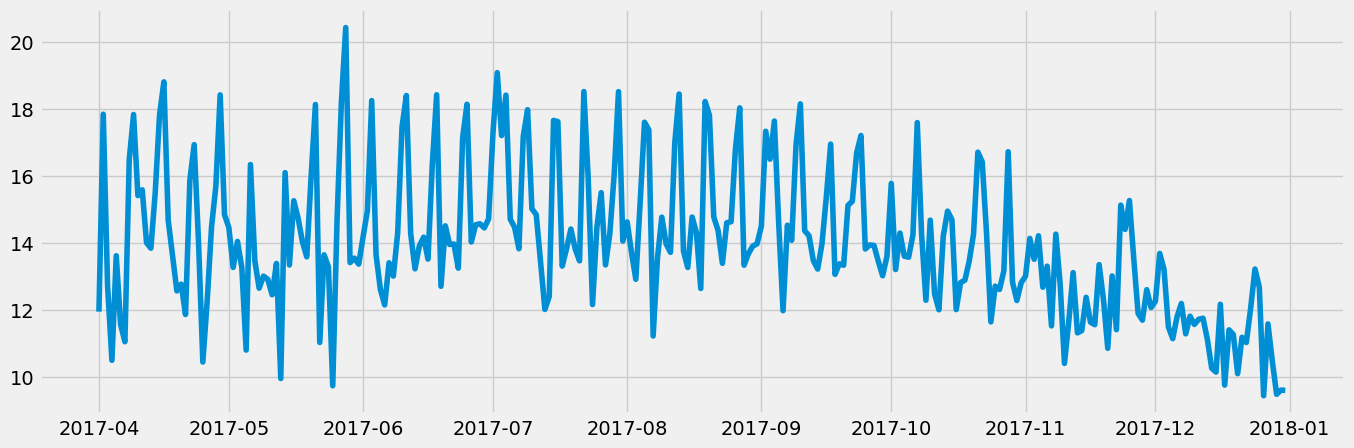

In [223]:
## plotting 

plt.figure(figsize=(15,5), dpi = 100)

plt.plot(df_2017)

### 3. Decomposition of the Data 

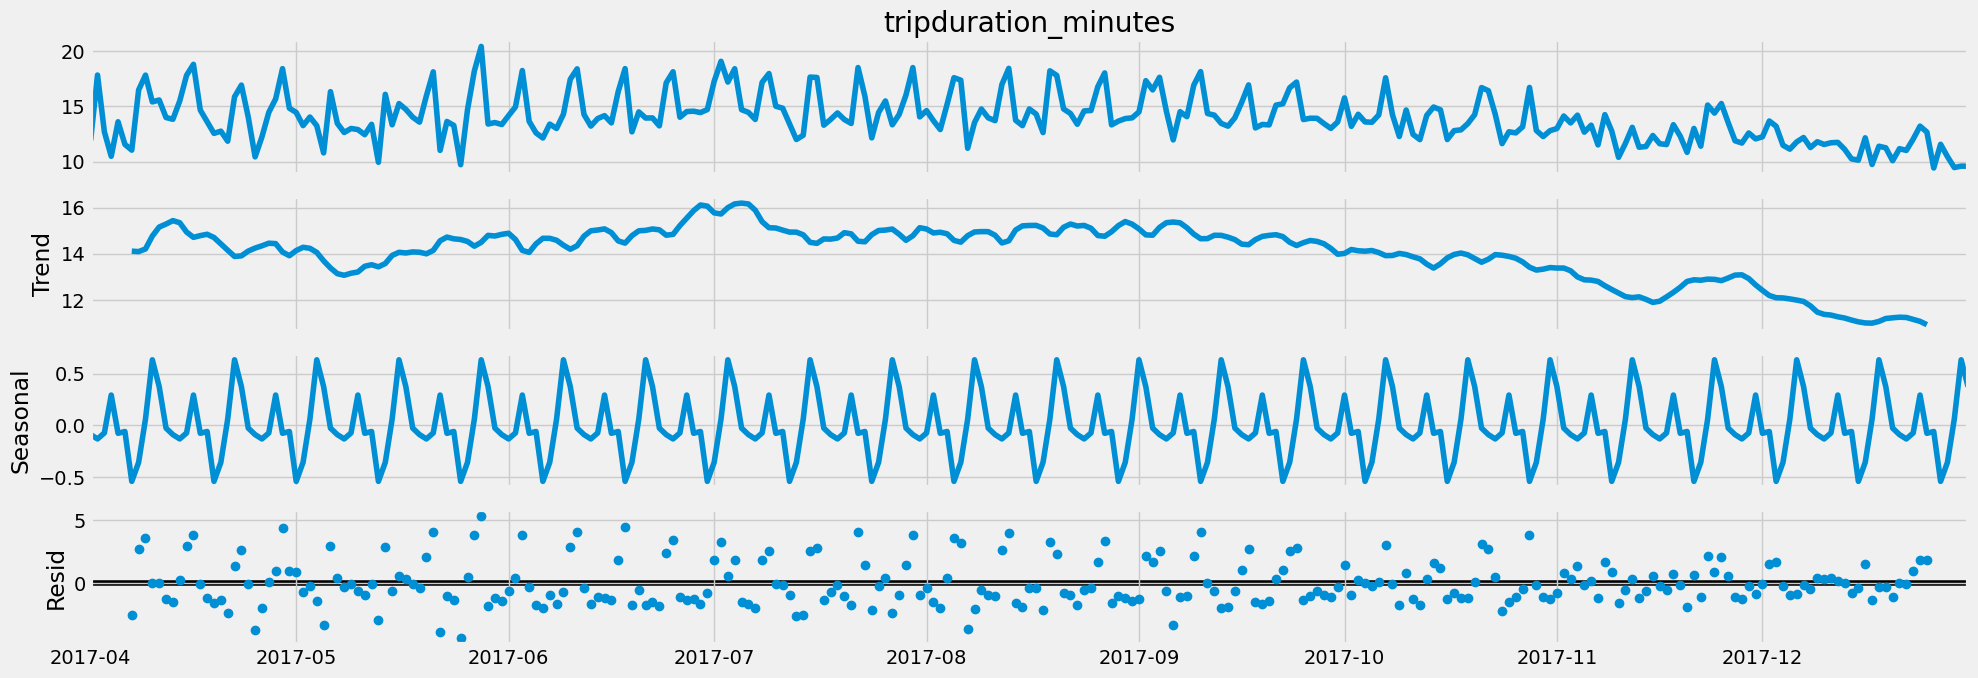

In [225]:

decomposition_2 = sm.tsa.seasonal_decompose(df_2017, model='additive', period=12)

# Plot decomposition
decomposition_2.plot()
plt.show()


#### The trip duration trend increases slightly from April to around August. Then, it stabilizes and starts decreasing towards December.
#### There is a strong seasonal component as we can see a repeating pattern - suggests a predictable demand for transportation at specific times of the day/week.
#### The residual component is scattered, meaning there are some unpredictable variations.

### 4. Dickey Fuller Statistical Test 

In [239]:
## Testing for stationarity 
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_2017['tripduration_minutes'])

Dickey-Fuller Stationarity test:
Test Statistic                   0.104064
p-value                          0.966337
Number of Lags Used             13.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (5%)             -2.872678
Critical Value (10%)            -2.572705
dtype: float64


#### Null Hypothesis: There is a unit root. In this example, if we decide on a significance level of 5% then the test statitistic is much larger than the critical value - therefore we can not reject the null hypothesis because there is a unit root in the data and the data is non-stationary. We will move forward with Stationarizing the data using Differencing.

### 5. Stationarizing the Data - Differencing 

In [245]:
data_diff = df_2017 - df_2017.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [247]:
data_diff.shape

(274, 1)

In [249]:
## Testing for stationarity after differencing 
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_diff['tripduration_minutes'])

Dickey-Fuller Stationarity test:
Test Statistic                -9.034585e+00
p-value                        5.331661e-15
Number of Lags Used            1.200000e+01
Number of Observations Used    2.610000e+02
Critical Value (1%)           -3.455656e+00
Critical Value (5%)           -2.872678e+00
Critical Value (10%)          -2.572705e+00
dtype: float64


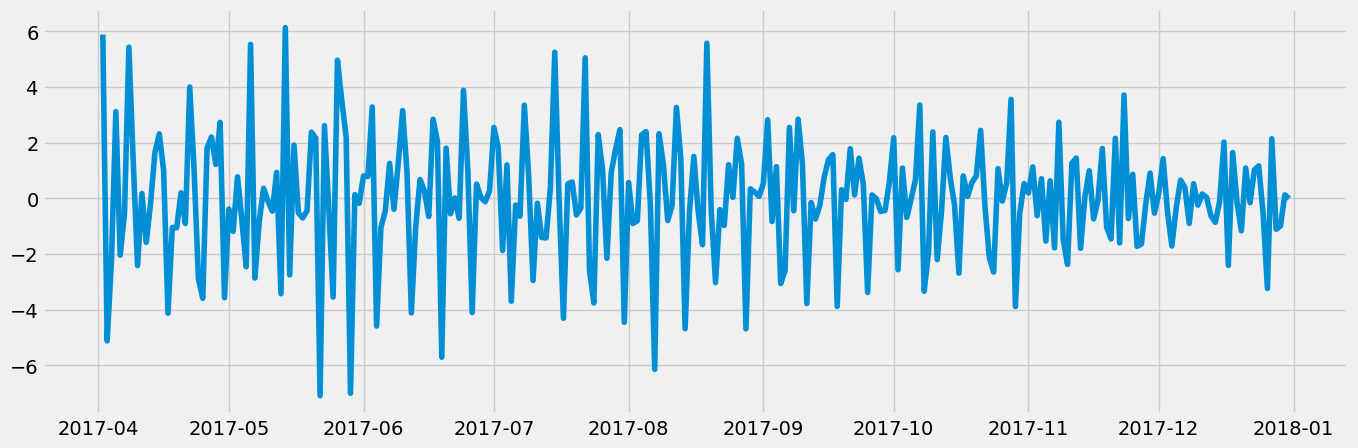

In [254]:
plt.figure(figsize=(15,5), dpi = 100)
plt.plot(data_diff)

<Figure size 1500x500 with 0 Axes>

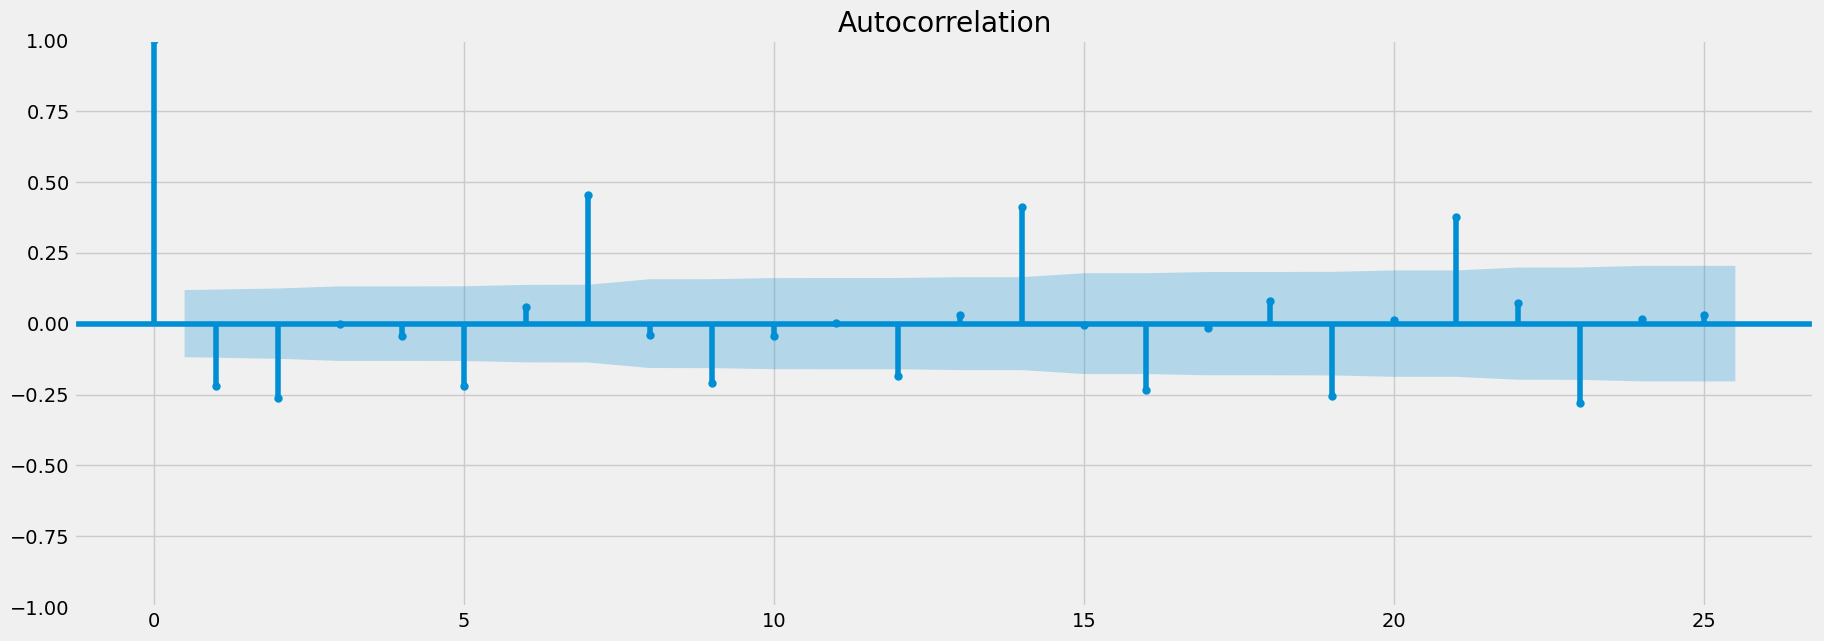

In [263]:
## Checking the data's auto correlation

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots
plt.figure(figsize=(15,5), dpi = 100)
plot_acf(data_diff)
plt.show()


#### We can see that the test statistic is much lower than the critical values - meaning we can now reject the null hypothesis. The pvalue is also very small meaning the series is now stationary and we can proceed with time series modeling(eg. ARIMA, etc..)